### Brief Overview
- **problem statement**: how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

- **dataset**: 8 columns, 1000 rows

- **steps**:
    - Understanding the Problem Statement
    - Data Collection
    - Data Checks to perform
    - Exploratory data analysis
    - Data Pre-Processing
    - Model Training
    - Choose best model

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('data/StudentsPerformance.csv')

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.shape # shows the dimensions of dataFrame (R x C)

data.info() # provides summary of dataFrame, including data types and non-null values.

data.isna().sum() # shows the number of missing values in each column.

data.nunique() # get the number of unique values of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [6]:
data.describe() # provides stats over columns with numerical data

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [7]:
# Exploring Data
print("Categories in `gender` variable:\t", data['gender'].unique())

print("Categories in `race/ethnicity` variable:\t", data['race/ethnicity'].unique())

print("Categories in `parental level of education` variable:\t", data['parental level of education'].unique())

print("Categories in `lunch` variable:\t", data['lunch'].unique())

print("Categories in `test preparation course` variable:\t", data['test preparation course'].unique())

Categories in `gender` variable:	 ['female' 'male']
Categories in `race/ethnicity` variable:	 ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in `parental level of education` variable:	 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in `lunch` variable:	 ['standard' 'free/reduced']
Categories in `test preparation course` variable:	 ['none' 'completed']


#### define numerical & categorical columns

In [8]:

# dtype in the above dataset can be either "object"(denoted by "o") or "int64"(which is not "o")

numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']

categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### Adding columns for "Total Score" and "Average"

In [9]:
data['total score'] = data['math score'] + data['reading score'] + data['writing score']

data['average'] = data['total score']/3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [10]:
mask = data['reading score'] == 100 # gives True/False value for each row
students_with_100_reading = data[mask] # gives the dataframe that satisfies the "mask"
# students_with_100_reading.head() # simply get the "head()" of this data
students_with_100_reading['average'].count()

# applying this to get students with full marks:
reading_full = data[data['reading score'] == 100]['average'].count()
writing_full = data[data['writing score'] == 100]['average'].count()
math_full = data[data['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


#### Exploring Data (Visualization)
- Histogram

- Kernel Distribution Function (KDE)
    > It is a curve line that displays the smoothened distribution of datapoints

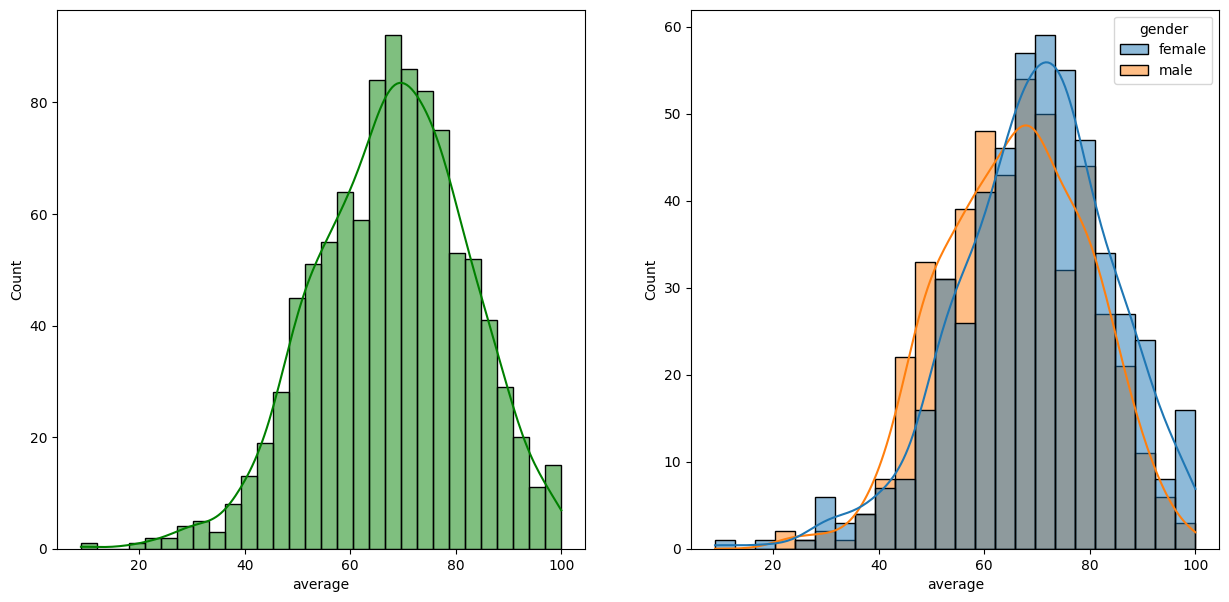

In [28]:
# w.r.t Gender (based on Average Score)
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='average',kde=True,hue='gender')
plt.show()

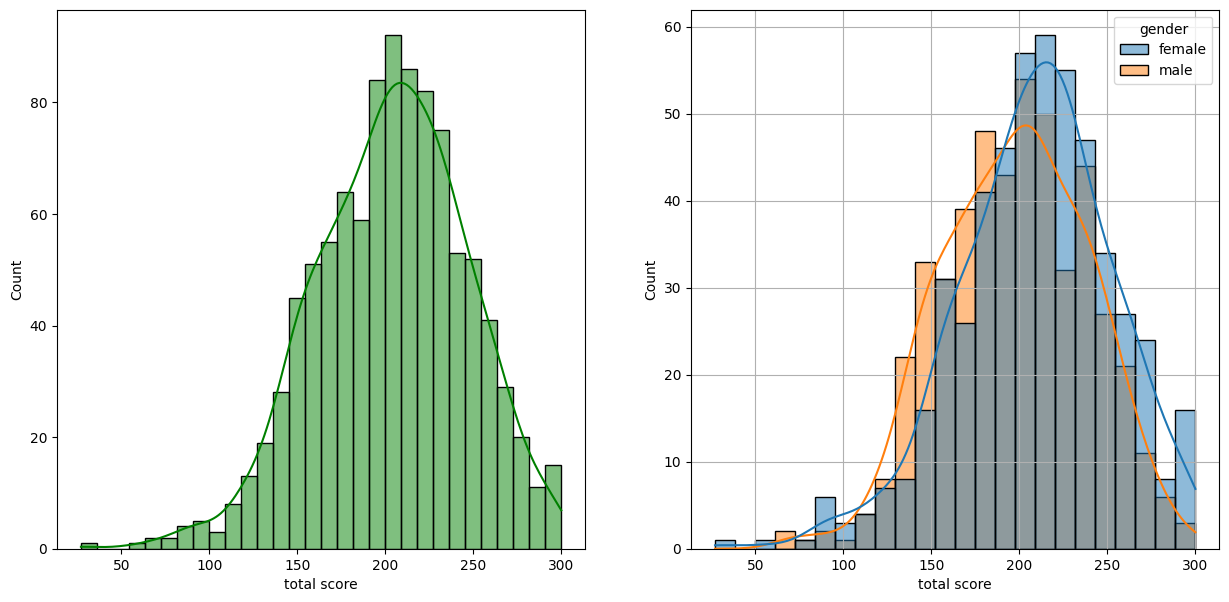

In [24]:
# w.r.t Gender (based on Total Score)
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='total score',kde=True,hue='gender')

plt.show()

#####  Insight: Female students tend to perform well then male students.

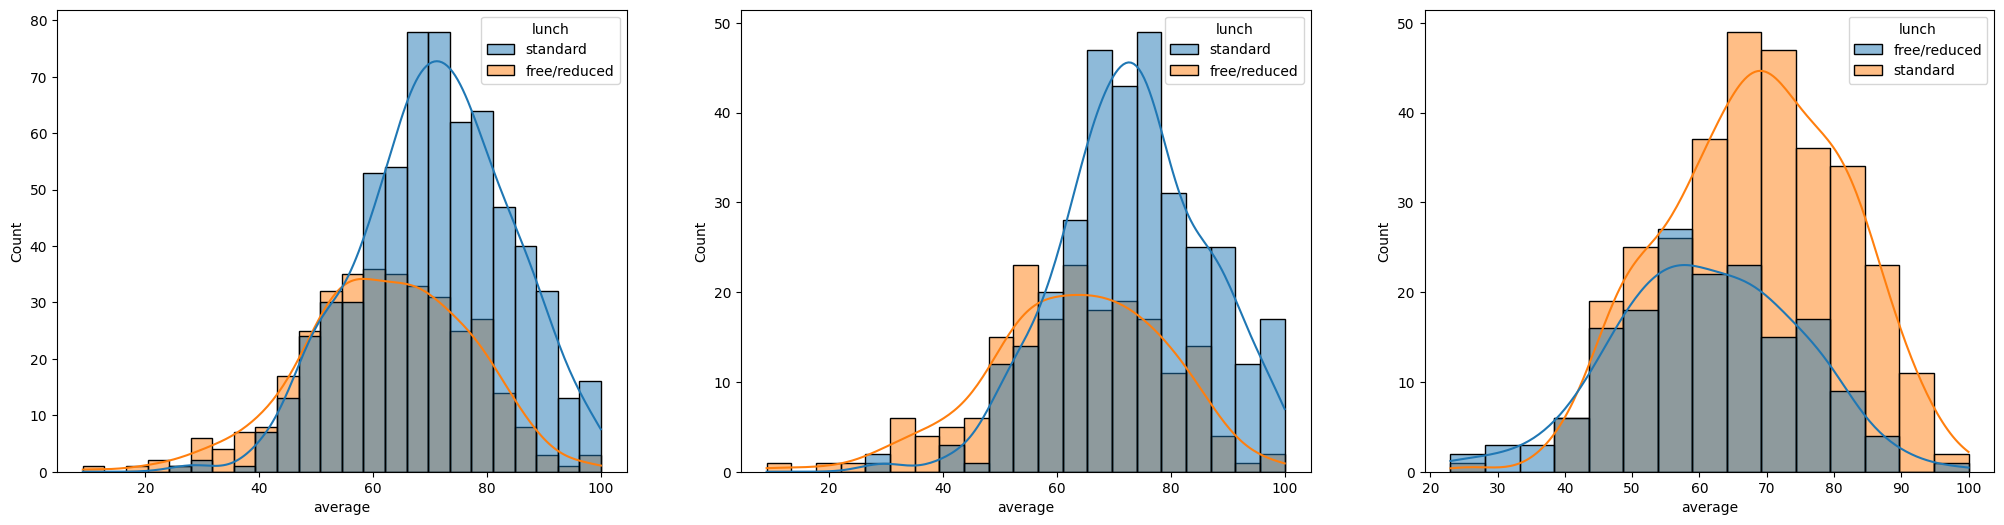

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=data,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#####  Insights: Standard lunch helps perform well in exams be it a male or a female.

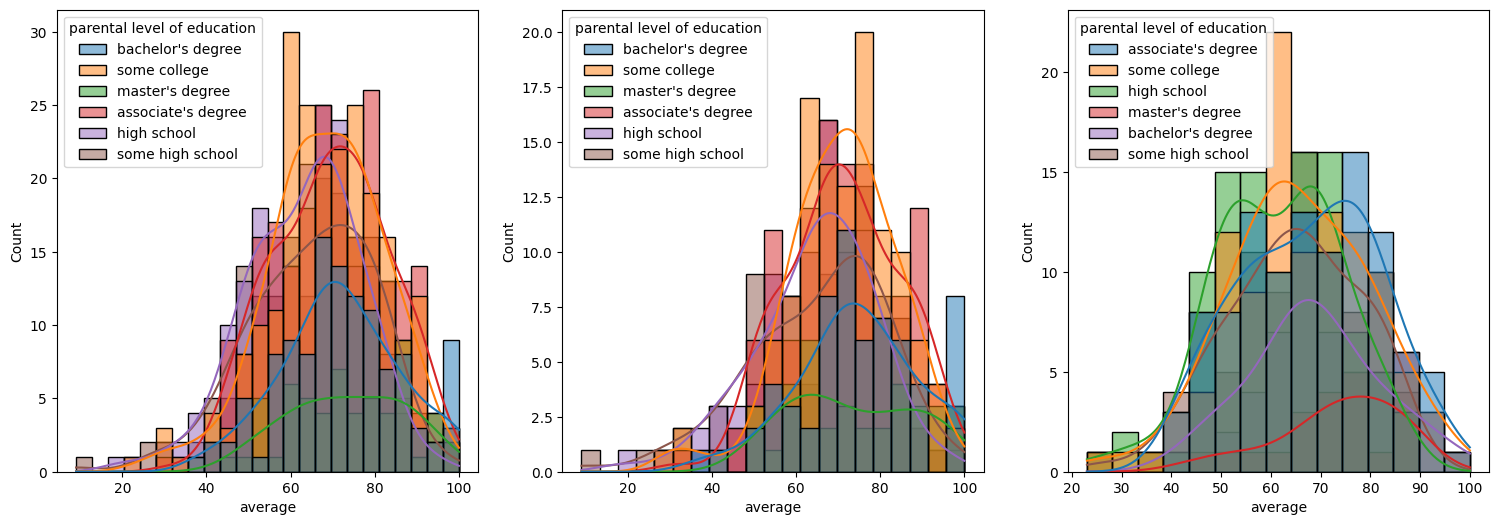

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data, x='average', kde=True, hue='parental level of education')
plt.subplot(142)
sns.histplot(data=data[data.gender == 'female'], x='average', kde=True, hue='parental level of education')
plt.subplot(143)
sns.histplot(data=data[data.gender == 'male'], x='average', kde=True, hue='parental level of education')

plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

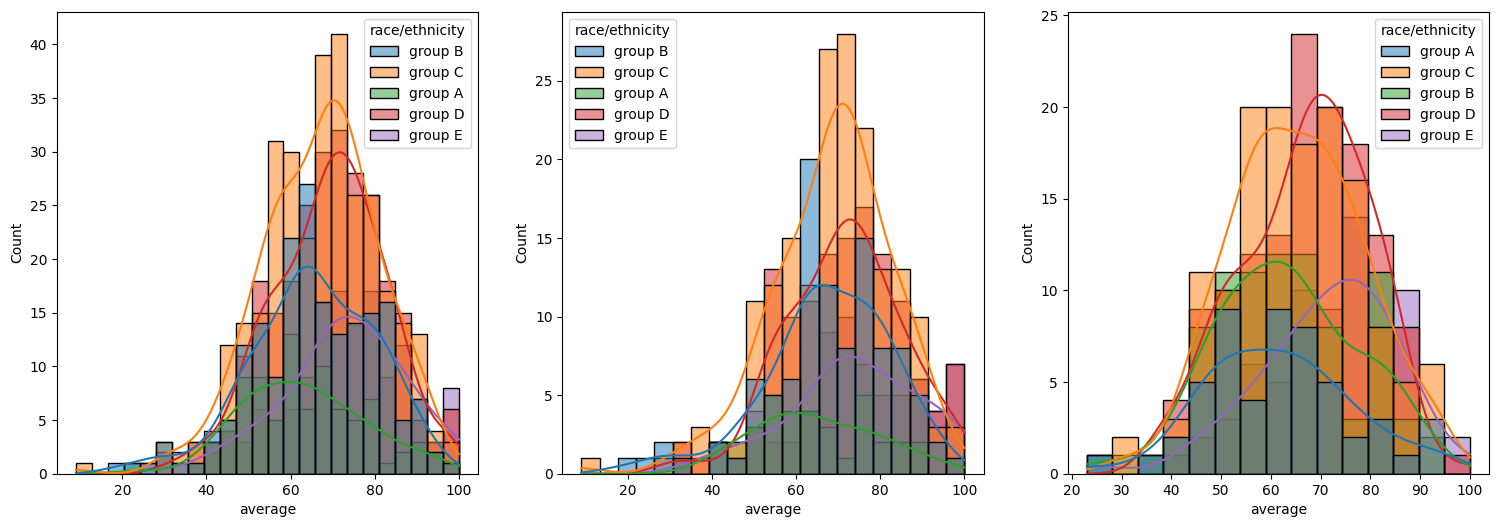

In [16]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

#####  Insights: Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

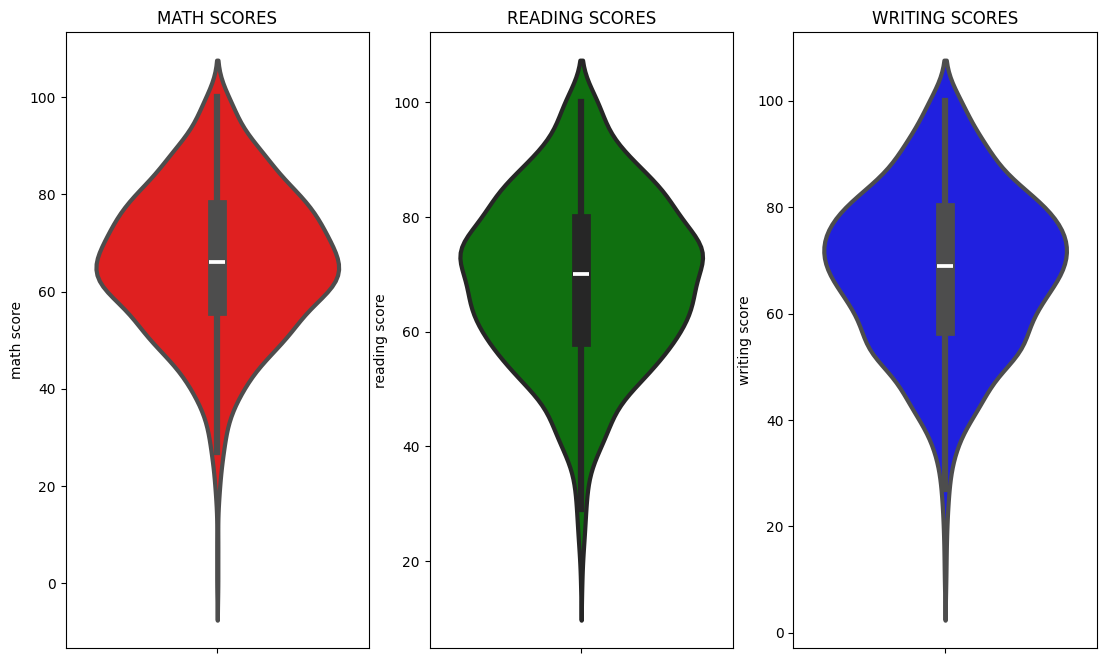

In [17]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=data,color='blue',linewidth=3)
plt.show()

#### Insights: its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

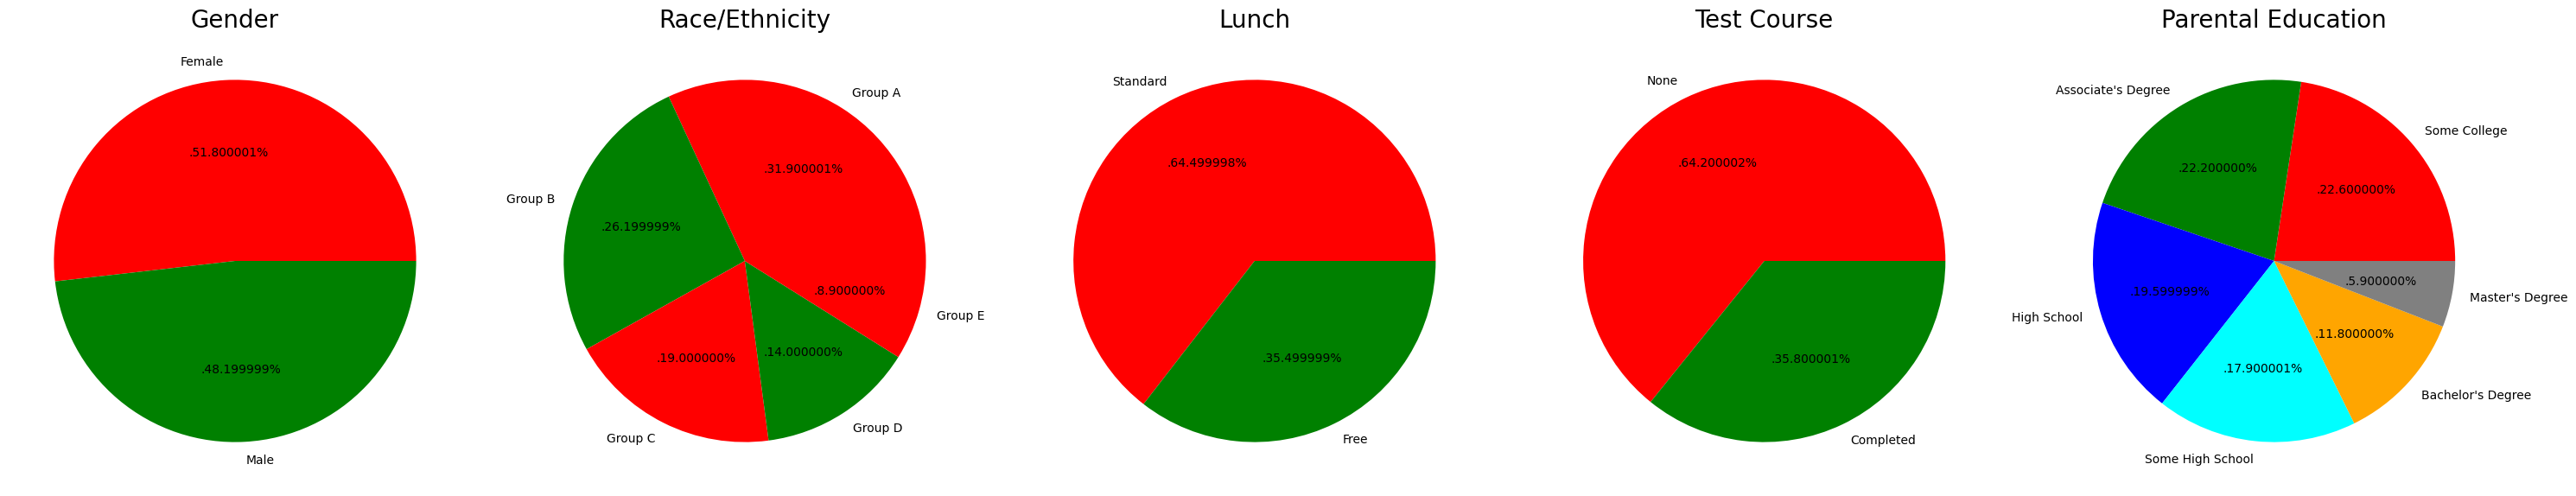

In [32]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = data['race/ethnicity'].value_counts()
labels = 'Group A', 'Group B', 'Group C', 'Group D', 'Group E'
color = ['red', 'green', ]

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = data['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = data['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights: to get estimates of no. of students within each feature & category